In [21]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 384)        

In [22]:
classifier.load_weights('D:/IIITNinternship/PlantLeafDiseaseDetection/best_weights_9.hdf5')

In [23]:
#Freeze Layers
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d_10
1 max_pooling2d_6
2 batch_normalization_16
3 conv2d_11
4 max_pooling2d_7
5 batch_normalization_17
6 conv2d_12
7 batch_normalization_18
8 conv2d_13
9 batch_normalization_19
10 conv2d_14
11 max_pooling2d_8
12 batch_normalization_20
13 flatten_2
14 dense_8
15 dropout_6
16 batch_normalization_21
17 dense_9
18 dropout_7
19 batch_normalization_22
20 dense_10
21 dropout_8
22 batch_normalization_23
23 dense_11


In [24]:
# we chose to train the top 2 conv blocks, i.e. we will freeze
# the first 8 layers and unfreeze the rest:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False


Freezed layers:
0 conv2d_10
1 max_pooling2d_6
2 batch_normalization_16
3 conv2d_11
4 max_pooling2d_7
5 batch_normalization_17
6 conv2d_12
7 batch_normalization_18
8 conv2d_13
9 batch_normalization_19
10 conv2d_14
11 max_pooling2d_8
12 batch_normalization_20
13 flatten_2
14 dense_8
15 dropout_6
16 batch_normalization_21
17 dense_9
18 dropout_7
19 batch_normalization_22


In [25]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 384)        

In [26]:
from keras import optimizers
classifier.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
base_dir = "D:/IIITNinternship/PlantDataset"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [28]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [29]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [30]:
train_num = training_set.samples
valid_num = valid_set.samples

In [31]:
# checkpoint
from keras.callbacks import ModelCheckpoint
weightpath = "best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

#fitting images to CNN
history = classifier.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=25,
                         validation_steps=valid_num//batch_size,
                         callbacks=callbacks_list)
#saving model
filepath="AlexNetModel.hdf5"
classifier.save(filepath)

Epoch 1/25
549/549 [==============================] - 1868s 3s/step - loss: 0.0990 - accuracy: 0.9680 - val_loss: 0.0732 - val_accuracy: 0.9755
Epoch 2/25
549/549 [==============================] - 2077s 4s/step - loss: 0.0949 - accuracy: 0.9689 - val_loss: 0.0719 - val_accuracy: 0.9755
Epoch 3/25
549/549 [==============================] - 2089s 4s/step - loss: 0.0942 - accuracy: 0.9693 - val_loss: 0.0711 - val_accuracy: 0.9757
Epoch 4/25
549/549 [==============================] - 3471s 6s/step - loss: 0.0922 - accuracy: 0.9701 - val_loss: 0.0705 - val_accuracy: 0.9759
Epoch 5/25
549/549 [==============================] - 2402s 4s/step - loss: 0.0922 - accuracy: 0.9700 - val_loss: 0.0702 - val_accuracy: 0.9763
Epoch 6/25
549/549 [==============================] - 1919s 3s/step - loss: 0.0931 - accuracy: 0.9693 - val_loss: 0.0697 - val_accuracy: 0.9764
Epoch 7/25
549/549 [==============================] - 1821s 3s/step - loss: 0.0900 - accuracy: 0.9709 - val_loss: 0.0697 - val_accuracy:

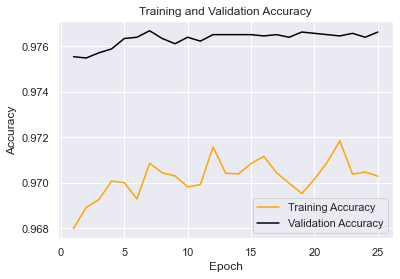

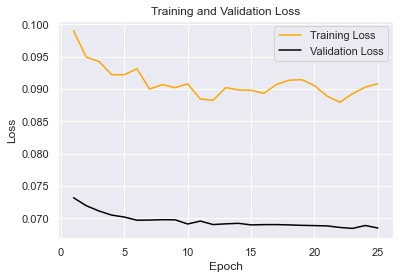

In [32]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='orange', label='Training Accuracy')
plt.plot(epochs, val_acc, color='black', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='orange', label='Training Loss')
plt.plot(epochs, val_loss, color='black', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Prediction:


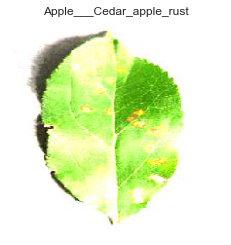

In [33]:
# prediction
from keras.preprocessing import image
import numpy as np
image_path = "D:/IIITNinternship/PlantDataset/test/AppleCedarRust1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Prediction:")
prediction = classifier.predict(img)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
       
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()